In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
data = pd.read_csv("amazon.csv")

In [3]:
data.head(5)

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


# Initial Observations

In [4]:
df = data.copy()

In [5]:
df.shape

(20000, 2)

In [6]:
# We have 20000 rows and 2 columns

In [7]:
df.nunique()

reviewText    20000
Positive          2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  20000 non-null  object
 1   Positive    20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [9]:
df.describe()

,Positive
count,20000.000000
mean,0.761650
std,0.426085
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [10]:
df.dtypes

reviewText    object
Positive       int64
dtype: object

([<matplotlib.patches.Wedge at 0x20a85a92f50>,
 [Text(-0.8057580416543408, 0.748835080848488, 'Positive'),
  Text(0.8057581117653374, -0.7488350054079725, 'Negative')])

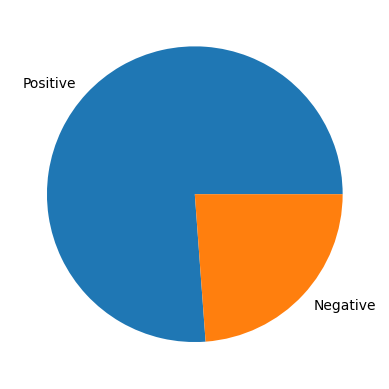

In [11]:
label = ["Positive","Negative"]
values = df["Positive"].value_counts()
plt.pie(labels = label, x = values)

<p>We can clearly see class imbalance here</p>

### Word Cloud

In [12]:
positive_reviews = ' '.join(df[df['Positive'] == 1]['reviewText'])
negative_reviews = ' '.join(df[df['Positive'] == 0]['reviewText'])

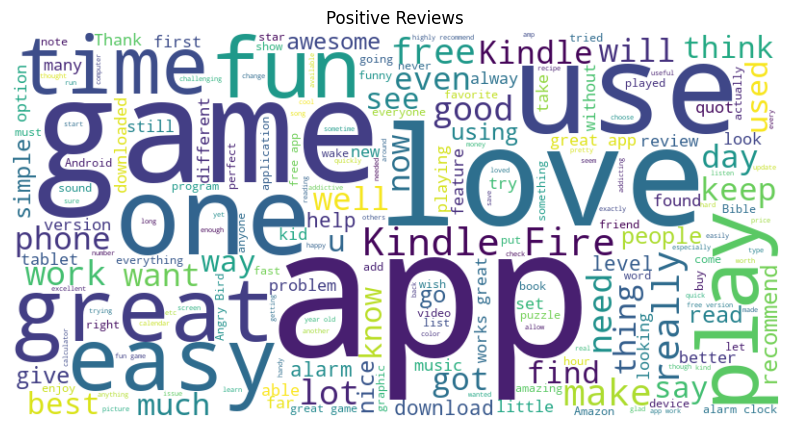

In [13]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews")
plt.show()

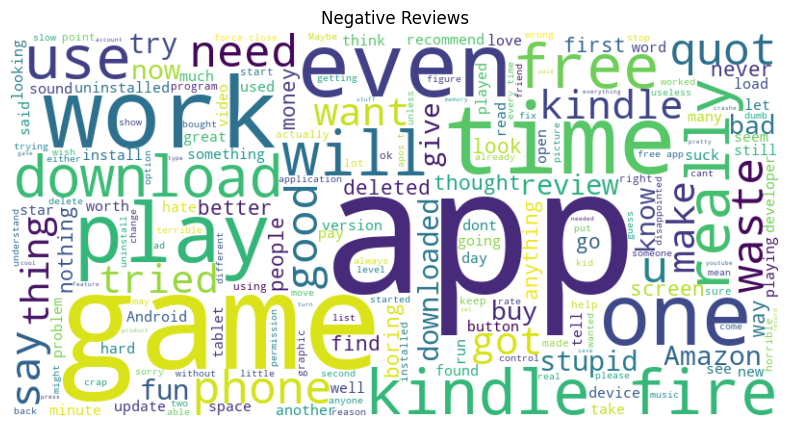

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews")
plt.show()

# Data Preprocessing

## Null Handling

In [15]:
df.isna().sum()

reviewText    0
Positive      0
dtype: int64

## Text Preprocessing

In [16]:
df["reviewText"][0]

'This is a one of the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff'

In [17]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import plotly.express as px
import string

In [18]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [19]:
stopword = stopwords.words("English")

In [20]:
punctuation = string.punctuation

In [21]:
def preprocess_text(text):
 
    preprocess_punctuation = "".join([char for char in text if char not in punctuation])
    preprocess_stopword = [char for char in preprocess_punctuation.split() if char.lower() not in stopword]
    return preprocess_stopword


In [22]:
df["reviewText"] = df["reviewText"].apply(preprocess_text)

In [23]:
df.head()

,reviewText,Positive
0,"[one, best, apps, acording, bunch, people, agr...",1
1,"[pretty, good, version, game, free, LOTS, diff...",1
2,"[really, cool, game, bunch, levels, find, gold...",1
3,"[silly, game, frustrating, lots, fun, definite...",1
4,"[terrific, game, pad, Hrs, fun, grandkids, lov...",1


# Text Normalization/Scaling

In [24]:
lemmatizer = WordNetLemmatizer()

In [25]:
df["reviewText"][0]

['one',
 'best',
 'apps',
 'acording',
 'bunch',
 'people',
 'agree',
 'bombs',
 'eggs',
 'pigs',
 'TNT',
 'king',
 'pigs',
 'realustic',
 'stuff']

In [26]:
def normalize_data(text):
    normalized_text = ' '.join([lemmatizer.lemmatize(word) for word in text])
    return normalized_text

In [27]:
df["reviewText"] = df["reviewText"].apply(normalize_data)

In [28]:
df.head()

,reviewText,Positive
0,one best apps acording bunch people agree bomb...,1
1,pretty good version game free LOTS different l...,1
2,really cool game bunch level find golden egg s...,1
3,silly game frustrating lot fun definitely reco...,1
4,terrific game pad Hrs fun grandkids love Great...,1


# Vectorization

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorizer = TfidfVectorizer()

In [31]:
X = vectorizer.fit_transform(df["reviewText"])
y = df["Positive"]

In [32]:
X.shape

(20000, 22617)

# Data Spliting

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
xtrain.shape

(14000, 22617)

# Model Training

In [36]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # naive bayes classifiers
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as mt

In [37]:
mnbNB = MultinomialNB()
berNB = BernoulliNB()
lr = LogisticRegression()

In [38]:
models = [mnbNB, berNB, lr]

In [39]:
def train_models(X_train,y_train, models):
    for model in models:
        model.fit(X_train,y_train)
        print(f"{model} : {mt.accuracy_score(y_train, model.predict(X_train))}")   

In [40]:
train_models(xtrain,ytrain,models)

MultinomialNB() : 0.8077857142857143
BernoulliNB() : 0.9132857142857143
LogisticRegression() : 0.9223571428571429


# Model Evaluation

In [41]:
def evaluate_model(X_test, y_test, models):

    y_predicted_list = []
    accuracy_scores = []

    for model in models:
        prediction = model.predict(X_test)
        y_predicted_list.append(prediction)
        accuracy_scores.append(mt.accuracy_score(y_test,prediction))
    
    for idx, prediction in enumerate(y_predicted_list):
        print(f"{models[idx]}")
        print()
        print("Test Accuracy Score: ",accuracy_scores[idx])
        print()
        print(mt.classification_report(y_test,prediction))
        print("-------------------------------------------------------------------------")

    return accuracy_scores, y_predicted_list

In [42]:
accuracy_scores, predictions = evaluate_model(xtest,ytest,models)

MultinomialNB()

Test Accuracy Score:  0.7873333333333333

              precision    recall  f1-score   support

           0       0.91      0.11      0.19      1411
           1       0.78      1.00      0.88      4589

    accuracy                           0.79      6000
   macro avg       0.85      0.55      0.53      6000
weighted avg       0.81      0.79      0.72      6000

-------------------------------------------------------------------------
BernoulliNB()

Test Accuracy Score:  0.8635

              precision    recall  f1-score   support

           0       0.80      0.56      0.66      1411
           1       0.88      0.96      0.91      4589

    accuracy                           0.86      6000
   macro avg       0.84      0.76      0.79      6000
weighted avg       0.86      0.86      0.85      6000

-------------------------------------------------------------------------
LogisticRegression()

Test Accuracy Score:  0.8843333333333333

              precision    rec

<p>By analyzing the classification reports above, we can see that Logistic Regression has the best accuracy with 88%.
</p>

### Accuracy Comparison

<BarContainer object of 3 artists>

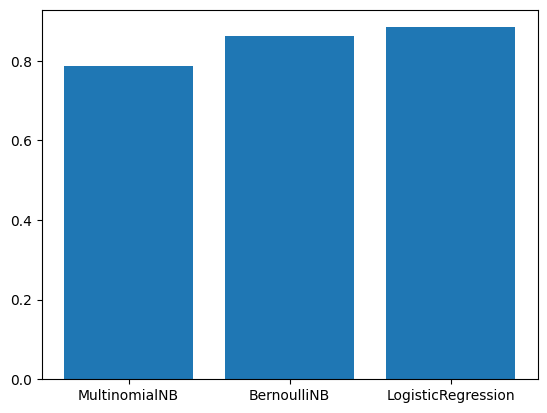

In [43]:
plt.bar(['MultinomialNB','BernoulliNB','LogisticRegression'], accuracy_scores)

## Multinomial Naive Bayes:
- **Test Accuracy Score:** 78.73%
- **Precision-Recall-F1 Score:**
  - Class 0: Precision 91%, Recall 11%, F1-Score 19%
  - Class 1: Precision 78%, Recall 100%, F1-Score 88%
  
An interesting start with a good overall accuracy, though there's room for improvement in predicting Class 0.

## Bernoulli Naive Bayes:
- **Test Accuracy Score:** 86.35%
- **Precision-Recall-F1 Score:**
  - Class 0: Precision 80%, Recall 56%, F1-Score 66%
  - Class 1: Precision 88%, Recall 96%, F1-Score 91%

Bernoulli Naive Bayes exhibits strong performance, particularly in correctly identifying instances of Class 1.

## Logistic Regression:
- **Test Accuracy Score:** 88.43%
- **Precision-Recall-F1 Score:**
  - Class 0: Precision 86%, Recall 60%, F1-Score 71%
  - Class 1: Precision 89%, Recall 97%, F1-Score 93%

Logistic Regression takes the lead with the highest accuracy and robust performance across both classes.

### Insights:
- Multinomial Naive Bayes shows potential but may benefit from additional optimization, especially in predicting Class 0.
- Bernoulli Naive Bayes excels in predicting Class 1, indicating its effectiveness in capturing relevant patterns.
- Logistic Regression emerges as a strong contender, offering high accuracy and balanced performance.


### Confusion Matrix

Text(50.722222222222214, 0.5, 'Actual')

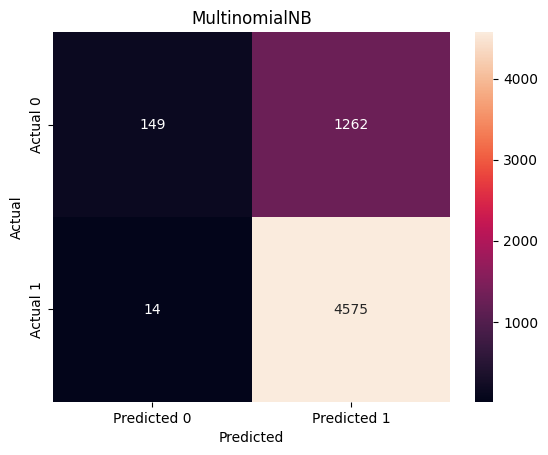

In [44]:
sns.heatmap(mt.confusion_matrix(ytest, predictions[0]),annot= True,fmt="d",yticklabels=["Actual 0", "Actual 1"],xticklabels=["Predicted 0", "Predicted 1"])
plt.title("MultinomialNB")
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(50.722222222222214, 0.5, 'Actual')

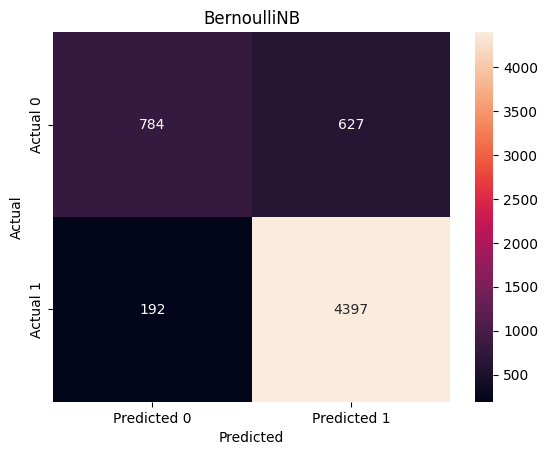

In [45]:
sns.heatmap(mt.confusion_matrix(ytest, predictions[1]),annot= True,fmt="d",yticklabels=["Actual 0", "Actual 1"],xticklabels=["Predicted 0", "Predicted 1"])
plt.title("BernoulliNB")
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(50.722222222222214, 0.5, 'Actual')

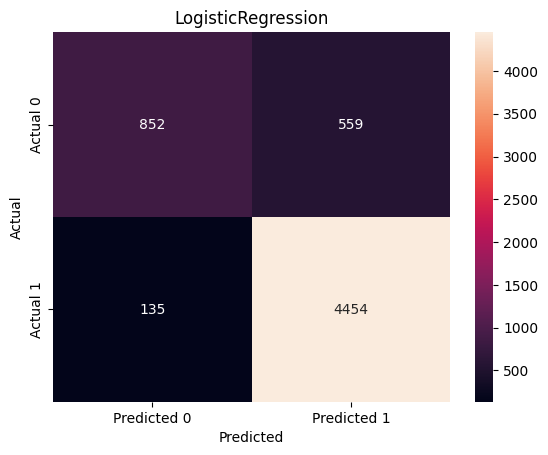

In [46]:
sns.heatmap(mt.confusion_matrix(ytest, predictions[2]),annot= True,fmt="d",yticklabels=["Actual 0", "Actual 1"],xticklabels=["Predicted 0", "Predicted 1"])
plt.title("LogisticRegression")
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Multinomial Naive Bayes:
- **True Positives (TP):** 4575
- **True Negatives (TN):** 149
- **False Positives (FP):** 1262
- **False Negatives (FN):** 14

### Observations:
- The model performs well in correctly predicting Class 1 (heart attack occurrence) with a high True Positive count.
- However, it struggles in predicting instances of Class 0, as indicated by the low True Negative count and a relatively high False Positive count.

## Bernoulli Naive Bayes:
- **True Positives (TP):** 4397
- **True Negatives (TN):** 784
- **False Positives (FP):** 627
- **False Negatives (FN):** 192

### Observations:
- The model shows a strong ability to predict both Class 0 and Class 1, with high counts in both True Positives and True Negatives.
- The False Positive count is relatively low, indicating a good balance between precision and recall.

## Logistic Regression:
- **True Positives (TP):** 4454
- **True Negatives (TN):** 852
- **False Positives (FP):** 559
- **False Negatives (FN):** 135

### Observations:
- Logistic Regression demonstrates a balanced performance in predicting both classes, with high counts in both True Positives and True Negatives.
- The False Positive count is relatively low, contributing to the model's high precision and accuracy.


### Roc Auc Curve

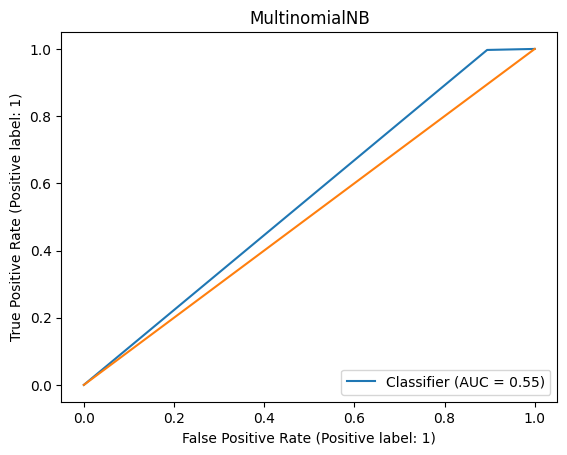

In [50]:
mt.RocCurveDisplay.from_predictions(ytest, predictions[0])
plt.plot([0,1],[0,1])
plt.title("MultinomialNB")
plt.show()

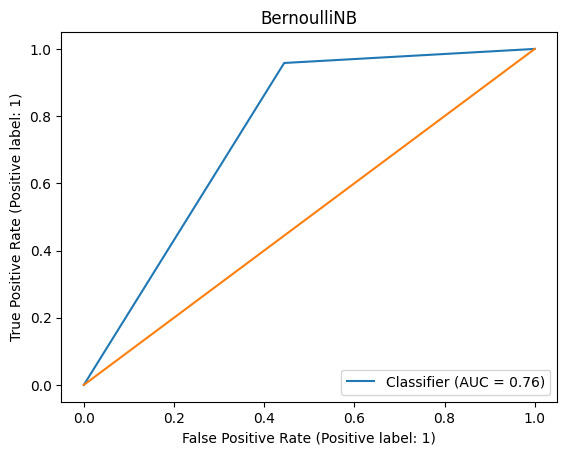

In [51]:
mt.RocCurveDisplay.from_predictions(ytest, predictions[1])
plt.plot([0,1],[0,1])
plt.title("BernoulliNB")
plt.show()

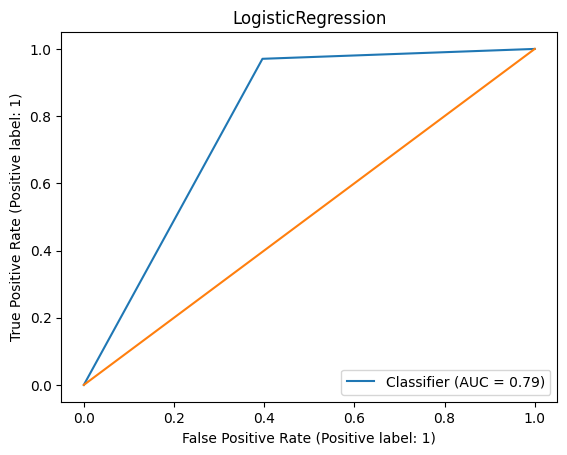

In [52]:
mt.RocCurveDisplay.from_predictions(ytest, predictions[2])
plt.plot([0,1],[0,1])
plt.title("LogisticRegression")
plt.show()

### The Logistic Regression Model performs better compared to other two models in ROC AUC Curve with a coverage of 79% percent.

## Summary:
- All three models perform well in predicting Class 1 (heart attack occurrence), with high True Positive counts.
- Multinomial Naive Bayes struggles more with predicting instances of Class 0, while Bernoulli Naive Bayes and Logistic Regression demonstrate better balance in predicting both classes.
- Logistic Regression stands out with the highest overall accuracy and balanced performance across both class

## Recommendations:
- For Multinomial Naive Bayes, consider addressing the imbalance in predicting Class 0 through further optimization or sampling techniques.
- Continue fine-tuning hyperparameters and exploring feature engineering for all models to improve overall performance.
es.